## Understanding The Difference in Trip Duration Between Citi Bike Riders
Vivaldi Rinaldi (var287)

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np


%pylab inline

import os
print("PUIdata", os.getenv("PUIDATA"))

Populating the interactive namespace from numpy and matplotlib
PUIdata /nfshome/var287/PUIdata


### Idea
CitiBike subscribers tend to have shorter trip duration than non-subscribers (customers) would.
### Hypothesis
**Null** - The proportion of CitiBike subscribers would have *same or longer trip duration* than the proportion of CitiBike customers' trip duration.

**Alternative** - The proportion of CitiBike subscribers would have *shorter trip duration* than the proportion of CitiBike customers' trip duration

Significance level = 0.05

### Download June 2017 CitiBike Data

In [2]:
!wget https://s3.amazonaws.com/tripdata/201706-citibike-tripdata.csv.zip
!unzip 201706-citibike-tripdata.csv.zip
!mv 201706-citibike-tripdata.csv.zip $PUIDATA
!mv 201706-citibike-tripdata.csv $PUIDATA

--2018-11-07 18:09:06--  https://s3.amazonaws.com/tripdata/201706-citibike-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.20.35
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.20.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60394834 (58M) [application/x-www-form-urlencoded]
Saving to: ‘201706-citibike-tripdata.csv.zip’

201706-citibike-tri 100%[===================>]  57.60M  24.2MB/s    in 2.4s    

2018-11-07 18:09:08 (24.2 MB/s) - ‘201706-citibike-tripdata.csv.zip’ saved [60394834/60394834]

Archive:  201706-citibike-tripdata.csv.zip
  inflating: 201706-citibike-tripdata.csv  


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/201706-citibike-tripdata.csv")

In [4]:
df['date'] = pd.to_datetime(df['starttime'])

In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1,2017-06-01 00:00:02
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1,2017-06-01 00:00:13
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1,2017-06-01 00:00:20
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2,2017-06-01 00:00:24
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1,2017-06-01 00:00:33


### Let's look at trip duration (in seconds) between usertype
Drop the df to only have trip duration and usertype column

In [7]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year','gender'], axis=1, inplace=True)

#### Split data into by usertype

In [8]:
subscriber = df.loc[df.usertype == 'Subscriber']
subscriber.head()

,tripduration,usertype,date
0,1397,Subscriber,2017-06-01 00:00:02
1,1103,Subscriber,2017-06-01 00:00:13
2,1810,Subscriber,2017-06-01 00:00:20
3,1760,Subscriber,2017-06-01 00:00:24
4,2165,Subscriber,2017-06-01 00:00:33


In [9]:
customer = df.loc[df.usertype == 'Customer']
customer.head()

,tripduration,usertype,date
50,1207,Customer,2017-06-01 00:04:53
84,394,Customer,2017-06-01 00:08:52
90,1570,Customer,2017-06-01 00:09:20
92,253,Customer,2017-06-01 00:09:25
93,248,Customer,2017-06-01 00:09:29


#### Average trip duration for each user type

In [10]:
subscriber.tripduration.mean()

861.13568787937913

In [11]:
customer.tripduration.mean()

2568.9217860437379

In [12]:
np.random.seed(2020)

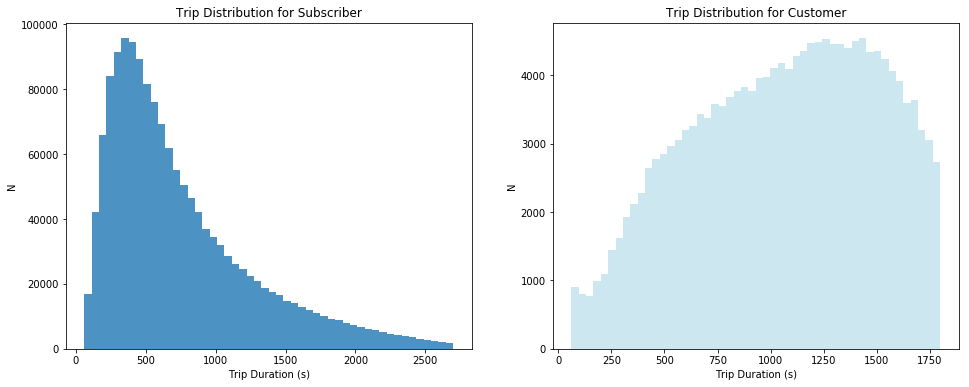

In [128]:
subs = subscriber[subscriber.tripduration < 2700]
cust = customer[customer.tripduration < 1800 ]

fig, ax = pl.subplots(2, figsize=(16,6))

pl.subplot(121)
pl.hist(subs.tripduration, bins = 50, label = "Subscriber", alpha = 0.8)
pl.title("Trip Distribution for Subscriber")
pl.xlabel("Trip Duration (s)")
pl.ylabel("N")



pl.subplot(122)
pl.hist(cust.tripduration, bins = 50, alpha = 0.6, color= "Lightblue", label= "Customer")
pl.xlabel("Trip Duration (s)")
pl.ylabel("N")

pl.title("Trip Distribution for Customer")

pl.show()



In [14]:
from scipy import stats

In [45]:
print(len(subs), "Subscribers"  , " / " , len(cust), "Customers" )

1501298 Subscribers  /  165626 Customers


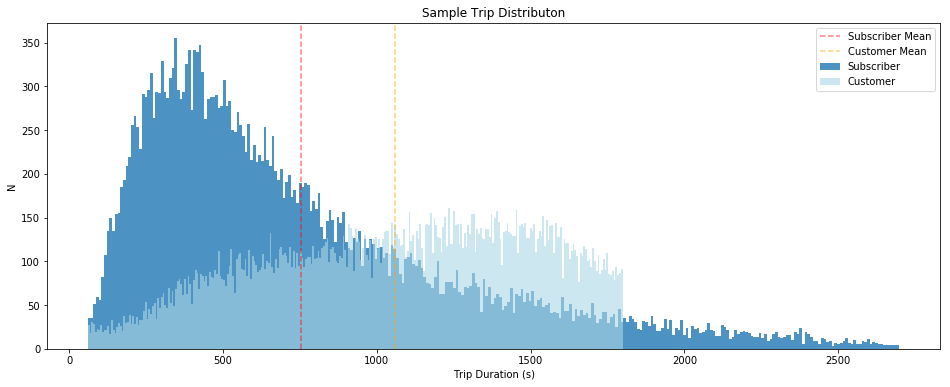

In [46]:
s = subs.sample(3000we c0)
c = cust.sample(30000)

fig, ax = pl.subplots(figsize=(16,6))

pl.hist(s.tripduration, bins = 300, alpha = 0.8, label = "Subscriber")
pl.hist(c.tripduration, bins = 300, alpha = 0.6, color= "Lightblue", label= "Customer")

pl.axvline(s.tripduration.mean(), color = "Red", label = "Subscriber Mean", linestyle = "--", alpha = 0.5)
pl.axvline(c.tripduration.mean(), color = "Orange", label = "Customer Mean", linestyle = "--", alpha = 0.5)

pl.xlabel("Trip Duration (s)")
pl.ylabel("N")

pl.legend(loc='upper right')
pl.title("Sample Trip Distributon")

pl.show()


In [37]:
results = stats.ttest_ind(s.tripduration, c.tripduration)
alpha = 0.05
if (results[0] < 0) & (results[1]/2 < alpha):
    print ("reject null hypothesis")
else:
    print ("accept null hypothesis")

reject null hypothesis


In [47]:
results

Ttest_indResult(statistic=-78.690573433292045, pvalue=0.0)

Text(0,0.5,'Trip Duration (s)')

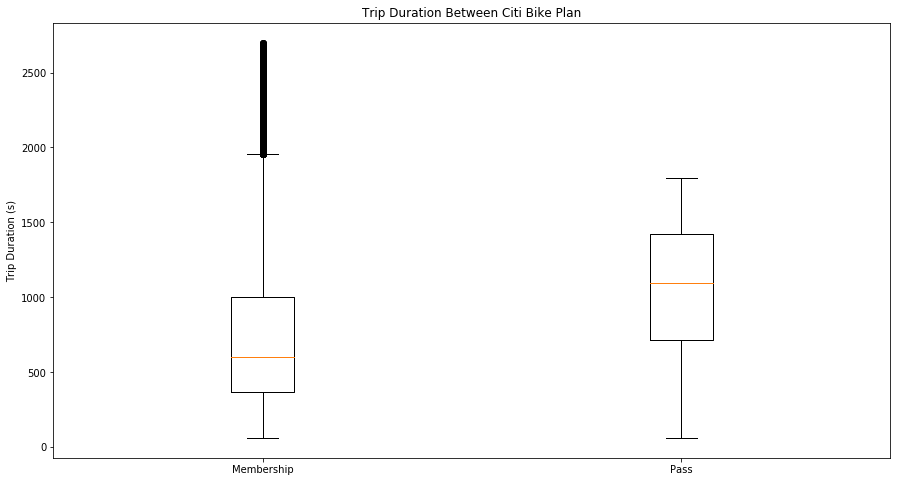

In [123]:
Membership = s.tripduration
Pass  = c.tripduration

data = [Membership, Pass]
fig = plt.figure(1, figsize=(15, 8))

ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(data)

ax.set_title("Trip Duration Between Citi Bike Plan")
ax.set_xticklabels(["Membership", "Pass"])
ax.set_ylabel("Trip Duration (s)")

